In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("levelups_panel_20240717.csv", encoding="utf-8")

In [40]:
# level_to 컬럼의 값이 100을 넘는 행 제거
data = data[data['level_to'] <= 100]
data['binge'] = (data['first_session_level'] >= 50).astype(int)
# 각 player_slug별로 비율 계산
data['prev_interval'] = data.groupby('player_slug')['interval'].shift(1)
data['interval_ratio'] = data.apply(lambda row: row['interval'] / (row['prev_interval'] if pd.notnull(row['prev_interval']) else row['interval']), axis=1)
#data.to_csv("LV100.csv",index=False, encoding="utf-8")


C:\Users\sunwoong\AppData\Local\Temp\ipykernel_37488\3402008499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['binge'] = (data['first_session_level'] >= 50).astype(int)
C:\Users\sunwoong\AppData\Local\Temp\ipykernel_37488\3402008499.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['prev_interval'] = data.groupby('player_slug')['interval'].shift(1)
C:\Users\sunwoong\AppData\Local\Temp\ipykernel_37488\3402008499.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [41]:
data_ratio_term = data[['player_slug','binge', 'level_to', 'interval_ratio']]

# 데이터 피벗
pivot_data_ratio = data_ratio_term.pivot_table(index='player_slug', columns='level_to', values='interval_ratio', aggfunc='mean')
binge_series = data.drop_duplicates('player_slug').set_index('player_slug')['binge']
pivot_data_ratio = pivot_data_ratio.join(binge_series)


#Random Sample 20000
sampled_data = pivot_data_ratio.sample(n=50000, random_state=102)
#pivot_data_reset = pivot_data.reset_index().melt(id_vars='character_slug', var_name='level_to', value_name='interval')
pivot_data_reset = sampled_data.reset_index().melt(id_vars=['player_slug', 'binge'], var_name='level_to', value_name='interval_ratio')


In [42]:
sampled_data

,2,3,4,5,6,7,8,9,10,11,...,92,93,94,95,96,97,98,99,100,binge
player_slug,,,,,,,,,,,,,,,,,,,,,
2021-12-19T14:42:01.626Z,1.0,0.793103,1.869565,1.209302,1.576923,0.902439,1.121622,1.156627,1.250000,1.133333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-03-08T12:53:50.466Z,1.0,0.586207,3.117647,1.132075,1.250000,1.266667,1.084211,1.184466,1.106557,1.318519,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2021-12-20T03:18:15.702Z,1.0,0.755556,2.911765,0.686869,144.808824,0.008632,95.623529,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-02-03T05:55:24.709Z,1.0,0.500000,3.000000,1.261905,1.000000,1.452830,1.064935,1.317073,1.055556,1.403509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-02-15T15:11:48.056Z,1.0,0.592593,4.437500,0.774648,1.127273,1.338710,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-06T09:35:07.141Z,1.0,0.375000,3.222222,0.862069,1.920000,4.833333,0.564655,0.442748,1.060345,704.780488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-01-25T15:55:19.376Z,1.0,0.500000,1.882353,2.656250,0.611765,1.826923,0.915789,2.574713,0.651786,1.116438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-03-18T09:03:22.286Z,1.0,0.490909,1.462963,1.025316,3.024691,0.510204,1.656000,1.772947,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [10]:
sampled_data.to_csv("LV100_sample.csv",index=False, encoding="utf-8")

In [12]:
data=pd.read_csv("LV100_sample.csv",encoding='utf-8')

In [20]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy.optimize import minimize

# 전처리 기간 설정 (50 기간)
preprocess_period = 50
preprocessed_data = data.iloc[:preprocess_period]

# 결측치 있는 열 및 행 제거
preprocessed_data = preprocessed_data.dropna(axis=1, how='all')
preprocessed_data = preprocessed_data.dropna(axis=0, how='all')
# Synthetic Control 모델 적용 함수
def synthetic_control(donor_pool, treated_unit):
    def objective(weights):
        return np.sum((treated_unit - donor_pool.dot(weights)) ** 2)
    
    cons = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    bounds = [(0, 1)] * donor_pool.shape[1]
    initial_weights = np.ones(donor_pool.shape[1]) / donor_pool.shape[1]
    
    result = minimize(objective, initial_weights, bounds=bounds, constraints=cons)
    return result.x

# 각 열에 대해 결측치를 채우기 위한 함수
def impute_missing_values(data):
    imputed_data = data.copy()
    for column in data.columns:
        if data[column].isna().sum() > 0:
            complete_cases = data.dropna(subset=[column])
            incomplete_cases = data[data[column].isna()]
            
            treated_unit = complete_cases[column].values
            donor_pool = complete_cases.drop(columns=[column]).values
            
            if donor_pool.shape[1] == 0:
                continue
            
            weights = synthetic_control(donor_pool, treated_unit)
            
            for idx in incomplete_cases.index:
                donor_values = data.loc[idx, data.columns != column].values
                imputed_value = donor_values.dot(weights)
                imputed_data.at[idx, column] = imputed_value
                
    return imputed_data
# 결측치 채우기
imputed_data = impute_missing_values(preprocessed_data)



In [67]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy.optimize import minimize

def synthetic_control(data, preprocess_period):
    data_filled = data.copy()
    columns_to_process = data.columns[:preprocess_period]
    
    for column in tqdm(columns_to_process, desc='Processing columns'):
        if data[column].isna().sum() > 0:
            # 결측치가 있는 행과 없는 행 분리
            complete_cases = data.dropna(subset=[column])
            incomplete_cases = data[data[column].isna()]
            
            if complete_cases.shape[0] < 2:  # 충분한 데이터가 없는 경우 스킵
                continue
            
            # X0: 대조군 데이터, X1: 처리 유닛 데이터
            X0 = complete_cases.drop(columns=[column]).values
            X1 = complete_cases[column].values
            
            def objective(weights):
                return np.sum((X1 - X0.dot(weights)) ** 2)
            
            cons = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}
            bounds = [(0, 1)] * X0.shape[1]
            initial_weights = np.ones(X0.shape[1]) / X0.shape[1]
            
            result = minimize(objective, initial_weights, bounds=bounds, constraints=cons)
            weights = result.x
            
            # 결측치 채우기
            for idx in incomplete_cases.index:
                donor_values = data_filled.loc[idx, complete_cases.columns != column].values
                donor_values = donor_values[~np.isnan(donor_values)]  # 결측치가 없는 값만 사용
                if len(donor_values) == len(weights):
                    imputed_value = donor_values.dot(weights)
                    data_filled.at[idx, column] = imputed_value
                else:
                    # 차원이 맞지 않는 경우 가중치를 조정
                    if len(donor_values) < len(weights):
                        adjusted_weights = weights[:len(donor_values)]
                    else:
                        adjusted_weights = np.pad(weights, (0, len(donor_values) - len(weights)), 'constant')
                    imputed_value = donor_values.dot(adjusted_weights)
                    data_filled.at[idx, column] = imputed_value
            # 처리 후 기간의 예측 값 채우기
            post_period_indices = data.index[preprocess_period:]
            for idx in post_period_indices:
                donor_values = data_filled.loc[idx, complete_cases.columns != column].values
                donor_values = donor_values[~np.isnan(donor_values)]  # 결측치가 없는 값만 사용
                if len(donor_values) == len(weights):
                    imputed_value = donor_values.dot(weights)
                    data_filled.at[idx, column] = imputed_value
                else:
                    # 차원이 맞지 않는 경우 가중치를 조정
                    if len(donor_values) < len(weights):
                        adjusted_weights = weights[:len(donor_values)]
                    else:
                        adjusted_weights = np.pad(weights, (0, len(donor_values) - len(weights)), 'constant')
                    imputed_value = donor_values.dot(adjusted_weights)
                    data_filled.at[idx, column] = imputed_value

    return data_filled

pivot_data_ratio =pd.read_csv("20240718_LV100_hour.csv",encoding='utf-8')
pivot_data_ratio_reset = pivot_data_ratio.reset_index(drop=True)
player_slug_backup = pivot_data_ratio_reset['player_slug']
pivot_data_ratio_dropped = pivot_data_ratio_reset.drop(columns=['player_slug'])



# 전처리 기간 설정 (예: 50)
preprocess_period = 50
#pivot_data_ratio_refined = pivot_data_ratio.iloc[:preprocess_period]

# 결측값 채우기
pivot_data_ratio_refined = synthetic_control(pivot_data_ratio_dropped, preprocess_period)
pivot_data_ratio_refined.insert(0, 'player_slug', player_slug_backup)




Processing columns: 100%|██████████| 50/50 [05:53<00:00,  7.07s/it]


In [69]:
pivot_data_ratio_refined.to_csv("check_plot.csv",encoding="utf-8",index=False)

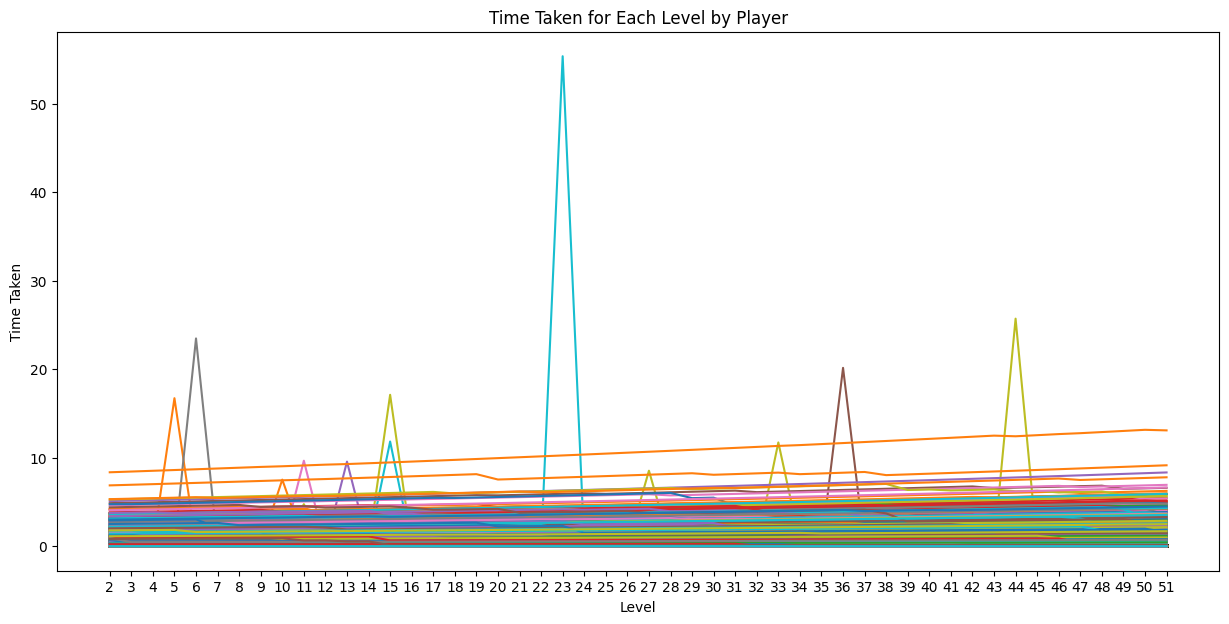

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'check_plot.csv'
data = pd.read_csv(file_path,encoding="utf-8")

# Extract player_slug column
player_slugs = data['player_slug']

# Drop the player_slug column for plotting
data_no_slug = data.drop(columns=['player_slug'])

# Select only the first 50 levels
levels_to_plot = data_no_slug.columns[:50]
data_no_slug = data_no_slug[levels_to_plot]

# Plot the data
plt.figure(figsize=(15, 7))

# Plot each player's data
for i in range(data_no_slug.shape[0]):
    plt.plot(levels_to_plot, data_no_slug.iloc[i], label=player_slugs[i])

plt.xlabel('Level')
plt.ylabel('Time Taken')
plt.title('Time Taken for Each Level by Player')
plt.show()

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
file_path = 'check_plot.csv'
data = pd.read_csv(file_path,encoding="utf-8")

# Extract player_slug column and set up data for plotting
player_slugs = data['player_slug']
data_no_slug = data.drop(columns=['player_slug'])

# Convert data to long format for seaborn
data_long = data_no_slug.melt(var_name='level_to', value_name='interval_ratio')
data_long['player_slug'] = pd.concat([player_slugs] * (data_no_slug.shape[1])).reset_index(drop=True)

# Remove non-numeric values from 'level_to' column
data_long = data_long[data_long['level_to'].str.isnumeric()]

# Convert level_to to numeric for plotting
data_long['level_to'] = data_long['level_to'].astype(int)

# Filter for levels 1 to 50
data_long_filtered = data_long[data_long['level_to'] <= 50]

# Plot the data using seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=data_long_filtered, x='level_to', y='interval_ratio', hue='player_slug', palette='rainbow', marker='o', legend=False)

# Customize the plot
plt.title('Level-Interval Ratio by Character Slug')
plt.xlabel('Level')
plt.ylabel('Ratio')

# Display the plot
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

: 

In [34]:
pivot_data_ratio_refined[:20]

,2,3,4,5,6,7,8,9,10,11,...,92,93,94,95,96,97,98,99,100,binge
0,1.0,0.793103,1.869565,1.209302,1.576923,0.902439,1.121622,1.156627,1.250000,1.133333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1.0,0.586207,3.117647,1.132075,1.250000,1.266667,1.084211,1.184466,1.106557,1.318519,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1.0,0.755556,2.911765,0.686869,144.808824,0.008632,95.623529,2.482780,2.507858,2.533190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1.0,0.500000,3.000000,1.261905,1.000000,1.452830,1.064935,1.317073,1.055556,1.403509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1.0,0.592593,4.437500,0.774648,1.127273,1.338710,0.093644,0.094590,0.095545,0.096510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,1.0,0.466667,3.785714,1.075472,1.298246,0.972973,1.055556,1.342105,1.225490,2.976000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,1.0,0.387097,2.250000,1.148148,1.645161,1.392157,1.126761,1.525000,0.959016,1.273504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,1.0,0.500000,2.083333,2.000000,0.960000,0.066094,0.066762,0.067436,0.068117,0.068805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,1.0,0.617647,2.428571,1.137255,0.982759,1.350877,1.051948,1.271605,70.990291,0.021882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,1.0,0.720000,2.111111,1.921053,0.671233,2.061224,0.801980,1.419753,1.191304,1.131387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [36]:
pivot_data_ratio_refined[:20]

,2,3,4,5,6,7,8,9,10,11,...,92,93,94,95,96,97,98,99,100,binge
0,1.0,0.793103,1.869565,1.209302,1.576923,0.902439,1.121622,1.156627,1.250000,1.133333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1.0,0.586207,3.117647,1.132075,1.250000,1.266667,1.084211,1.184466,1.106557,1.318519,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1.0,0.755556,2.911765,0.686869,144.808824,0.008632,95.623529,2.482780,2.507858,2.533190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1.0,0.500000,3.000000,1.261905,1.000000,1.452830,1.064935,1.317073,1.055556,1.403509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1.0,0.592593,4.437500,0.774648,1.127273,1.338710,0.093644,0.094590,0.095545,0.096510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,1.0,0.466667,3.785714,1.075472,1.298246,0.972973,1.055556,1.342105,1.225490,2.976000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,1.0,0.387097,2.250000,1.148148,1.645161,1.392157,1.126761,1.525000,0.959016,1.273504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,1.0,0.500000,2.083333,2.000000,0.960000,0.066094,0.066762,0.067436,0.068117,0.068805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,1.0,0.617647,2.428571,1.137255,0.982759,1.350877,1.051948,1.271605,70.990291,0.021882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,1.0,0.720000,2.111111,1.921053,0.671233,2.061224,0.801980,1.419753,1.191304,1.131387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [16]:
preprocessed_data.to_csv("check_cont.csv",index=False, encoding="utf-8")

In [ ]:
column_medians = pivot_data_ratio.median(skipna=True)
column_medians.max()

In [ ]:

pivot_data_ratio[pivot_data_ratio > 10] = np.nan
na_counts = pivot_data_ratio.isna().sum()
na_counts[:50]